Found 100 images belonging to 20 classes.


c:\Users\KOPPOLE AAKRITHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9599 - loss: 0.1669
Validation Accuracy: 0.9700
Validation Loss: 0.1520
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step

Classification Report:

                            precision    recall  f1-score   support

           ABBOTTS BABBLER       1.00      1.00      1.00         5
             ABBOTTS BOOBY       1.00      0.60      0.75         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       1.00      1.00      1.00         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      0.80      0.89         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       0.71      1.00      0.83         5
            ALBERTS TOWHEE       1.00      1.00      1.00         

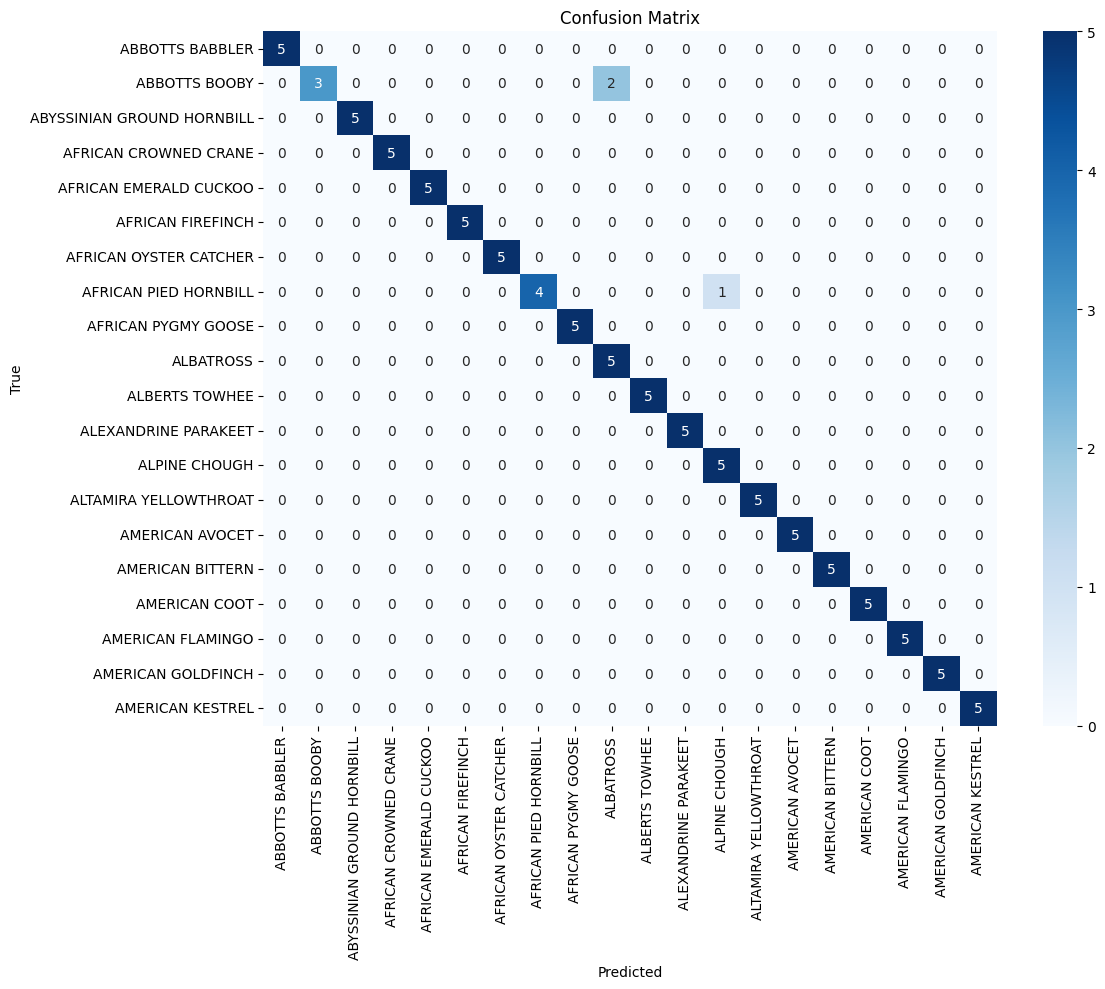

In [5]:
# Bird Model Evaluation Notebook

# 🧠 Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# 📁 Load model
model = load_model('efficientnet_bird_model.keras')

# 📸 Image generator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Adjust path and target_size to your validation folder
val_gen = val_datagen.flow_from_directory(
    r'C:/Users/KOPPOLE AAKRITHI/OneDrive/Documents/bird_classification/bird_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


# ✅ Evaluate model
loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc:.4f}")
print(f"Validation Loss: {loss:.4f}")

# 🧾 Classification Report
predictions = model.predict(val_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

# 📊 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
